### Detecting Parkinson’s Disease

In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier # XGBOOST
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Read dataset

In [2]:
# Read the data
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Missing values

In [3]:
# check for missing vaules
print(df.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


Exploring datasets using pandas profiling

In [4]:
!pip install pandas-profiling==2.7.1

In [5]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Explore the data using histogram

In [6]:
fig = px.histogram(df,x='status')
fig.show()

Correlation Matrix

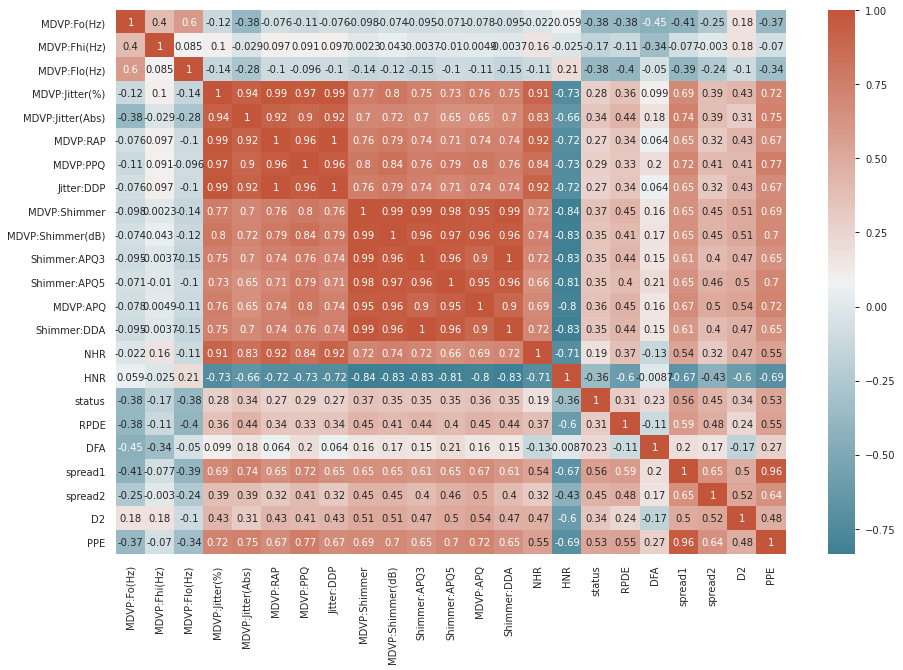

In [7]:
import matplotlib
import matplotlib.pyplot as plt
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

##### Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [8]:
# Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

#### The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1

In [9]:
# Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


##### Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [10]:
# Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

#### split the dataset into training and testing sets keeping 20% of the data for testing.

In [11]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=7)

##### Initialize an XGBClassifier and train the model. This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. It falls under the category of Ensemble Learning in ML, where we train and predict using many models to produce one superior output.

In [12]:
# Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##### Generate y_pred (predicted values for x_test) and calculate the accuracy for the model. Print it out.

In [13]:
# Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

95.91836734693877
